In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data = pd.read_csv('prices-split-adjusted.csv')

In [4]:
data.head()

,date,symbol,open,close,low,high,volume
0,2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
1,2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2,2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
3,2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
4,2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [5]:
data.shape

(851264, 7)

In [6]:
data.symbol.unique()

array(['WLTW', 'A', 'AAL', 'AAP', 'AAPL', 'ABC', 'ABT', 'ACN', 'ADBE',
       'ADI', 'ADM', 'ADP', 'ADS', 'ADSK', 'AEE', 'AEP', 'AES', 'AET',
       'AFL', 'AGN', 'AIG', 'AIZ', 'AJG', 'AKAM', 'ALB', 'ALK', 'ALL',
       'ALXN', 'AMAT', 'AME', 'AMG', 'AMGN', 'AMP', 'AMT', 'AMZN', 'AN',
       'ANTM', 'AON', 'APA', 'APC', 'APD', 'APH', 'ARNC', 'ATVI', 'AVB',
       'AVGO', 'AVY', 'AWK', 'AXP', 'AYI', 'AZO', 'BA', 'BAC', 'BAX',
       'BBBY', 'BBT', 'BBY', 'BCR', 'BDX', 'BEN', 'BHI', 'BIIB', 'BK',
       'BLK', 'BLL', 'BMY', 'BSX', 'BWA', 'BXP', 'C', 'CA', 'CAG', 'CAH',
       'CAT', 'CB', 'CBG', 'CBS', 'CCI', 'CCL', 'CELG', 'CERN', 'CF',
       'CHD', 'CHK', 'CHRW', 'CI', 'CINF', 'CL', 'CLX', 'CMA', 'CMCSA',
       'CME', 'CMG', 'CMI', 'CMS', 'CNC', 'CNP', 'COF', 'COG', 'COH',
       'COL', 'COO', 'COP', 'COST', 'CPB', 'CRM', 'CSCO', 'CSX', 'CTAS',
       'CTL', 'CTSH', 'CTXS', 'CVS', 'CVX', 'CXO', 'D', 'DAL', 'DD', 'DE',
       'DFS', 'DG', 'DGX', 'DHI', 'DHR', 'DIS', 'DISCA', 'DISCK', 

In [8]:
df_yahoo = data[data['symbol'] == 'YHOO']

In [9]:
df_yahoo.head()

,date,symbol,open,close,low,high,volume
713,2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
1181,2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
1649,2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2117,2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2585,2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [10]:
df_yahoo.shape

(1762, 7)

In [11]:
df_yahoo.describe()

,open,close,low,high,volume
count,1762.000000,1762.000000,1762.000000,1762.000000,1.762000e+03
mean,27.297917,27.291992,26.975602,27.609977,1.996907e+07
std,11.412612,11.406846,11.289736,11.526101,1.376851e+07
min,11.300000,11.090000,11.090000,11.800000,2.586900e+06
25%,15.950000,15.920000,15.770000,16.110001,1.235152e+07
50%,26.770001,26.750000,26.495000,27.105000,1.639070e+07
75%,37.335000,37.377501,36.897501,37.689999,2.325988e+07
max,52.279999,52.369999,51.639999,52.619999,2.338721e+08


In [12]:
df_yahoo.isnull().sum()

date      0
symbol    0
open      0
close     0
low       0
high      0
volume    0
dtype: int64

In [14]:
df_yahoo['date'] = pd.to_datetime(df_yahoo['date'])

<ipython-input-14-2ed92b52d5dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yahoo['date'] = pd.to_datetime(df_yahoo['date'])


In [17]:
print(df_yahoo.date.dtype)

datetime64[ns]


In [18]:
df_yahoo = df_yahoo.set_index("date")
df_yahoo.head()

,symbol,open,close,low,high,volume
date,,,,,,
2010-01-04,YHOO,16.940001,17.100000,16.879999,17.200001,16587400.0
2010-01-05,YHOO,17.219999,17.230000,17.000000,17.230000,11718100.0
2010-01-06,YHOO,17.170000,17.170000,17.070000,17.299999,16422000.0
2010-01-07,YHOO,16.809999,16.700001,16.570000,16.900000,31816300.0
2010-01-08,YHOO,16.680000,16.700001,16.620001,16.760000,15470000.0


In [19]:
yahoo_data = df_yahoo.asfreq('b')

In [20]:
yahoo_data.tail()

,symbol,open,close,low,high,volume
date,,,,,,
2016-12-26,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-27,YHOO,38.590000,38.919998,38.500000,39.070000,4240300.0
2016-12-28,YHOO,39.119999,38.730000,38.709999,39.220001,4393500.0
2016-12-29,YHOO,38.759998,38.639999,38.480000,38.930000,4170200.0
2016-12-30,YHOO,38.720001,38.669998,38.430000,39.000000,6431600.0


In [21]:
yahoo_data.isnull().sum()

symbol    63
open      63
close     63
low       63
high      63
volume    63
dtype: int64

In [22]:
null_data = yahoo_data[yahoo_data.isnull().any(axis=1)]
null_dates = null_data.index.tolist()

In [23]:
import calendar
import datetime

holidays = []

for date in null_dates:
    week, day, month, year = date.weekday(), date.day, date.month, date.year
    week_day = calendar.day_name[week]

    if month==1:
        if day==1:
            holidays.append(date)
        elif day==2 and week_day=='Monday':
            holidays.append(date)
        elif day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==2:
        if day>=15 and day<=21 and week_day=='Monday':
            holidays.append(date)

    elif month==5:
        if day>=25 and day<=31 and week_day=='Monday':
            holidays.append(date)

    elif month==7:
        if day==4:
            holidays.append(date)
        elif day==5 and week_day=='Monday':
            holidays.append(date)
        elif day==3 and week_day=='Friday':
            holidays.append(date)

    elif month == 9:
        if day>=1 and day<=7 and week_day=='Monday':
            holidays.append(date)

    elif month==11:
        if week_day=='Thursday' and day>=22 and day<=28:
            holidays.append(date)

    elif month==12:
        if day==25:
            holidays.append(date)
        elif day==24 and week_day=='Friday':
            holidays.append(date)
        elif day==26 and week_day=='Monday':
            holidays.append(date)

good_fridays = [ datetime.date(2010,4,2), datetime.date(2011,4,22), datetime.date(2012,4,6), datetime.date(2013,3,29), datetime.date(2014,4,18), datetime.date(2015,4,3), datetime.date(2016,3,25) ]
holidays = holidays + [pd.to_datetime(date) for date in good_fridays]

In [25]:
non_holidays = [x for x in null_dates if x not in holidays]

In [34]:
modified = yahoo_data.drop(holidays)
modified.shape

(1764, 6)

In [35]:
modified.isnull().sum()

symbol    2
open      2
close     2
low       2
high      2
volume    2
dtype: int64

In [36]:
modified = modified.fillna(method='bfill')

In [40]:
closing = modified.close.values.astype('float32')
closing = closing.reshape(-1, 1)

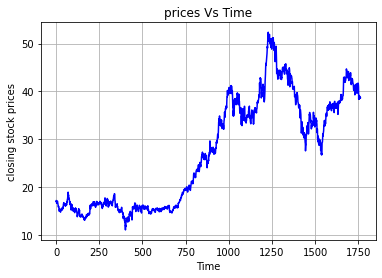

In [43]:
plt.xlabel('Time')
plt.ylabel('closing stock prices')
plt.title('prices Vs Time')
plt.grid(True)
plt.plot(closing, 'b')
plt.show()

In [46]:
n_train = int(len(closing) * 0.80)
n_remaining = len(closing) - n_train

n_val = int(n_remaining*0.50)
n_test = n_remaining - n_val 

train_data = closing[0:n_train]
print(train_data.shape)

val_data = closing[n_train:n_train + n_val]
print(val_data.shape)

test_data = closing[n_train + n_val:]
print(test_data.shape)

(1411, 1)
(176, 1)
(177, 1)


In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

train = scaler.fit_transform(train_data)
val = scaler.transform(val_data)
test = scaler.transform(test_data)

In [48]:
def create_dataset(data , n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features-1):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i + n_features, 0])
    return np.array(dataX), np.array(dataY)

n_features = 2

trainX, trainY = create_dataset(train, n_features)
valX, valY = create_dataset(val, n_features)
testX, testY = create_dataset(test, n_features)

print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

#Timestep = 1
trainX = trainX.reshape(trainX.shape[0] , 1 ,trainX.shape[1])
valX = valX.reshape(valX.shape[0] , 1 ,valX.shape[1])
testX = testX.reshape(testX.shape[0] , 1 ,testX.shape[1])

print(trainX.shape , trainY.shape , valX.shape , valY.shape, testX.shape , testY.shape)

(1408, 2) (1408,) (173, 2) (173,) (174, 2) (174,)
(1408, 1, 2) (1408,) (173, 1, 2) (173,) (174, 1, 2) (174,)


In [49]:
import tensorflow as tf
tf.random.set_seed(42)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [51]:
model = keras.models.Sequential()
model.add(layers.GRU(units=100, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

model.add(layers.GRU(units=150, return_sequences=True, input_shape=(1,n_features), activation='tanh'))
model.add(layers.Dropout(0.2))

model.add(layers.GRU(units=100, activation='tanh'))
model.add(layers.Dropout(0.2))

model.add(layers.Dense(units=1, kernel_initializer='he_uniform', activation='linear'))

model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0001) , metrics = ['mean_squared_error'])

In [52]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 1, 100)            31200     
_________________________________________________________________
dropout (Dropout)            (None, 1, 100)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 1, 150)            113400    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 150)            0         
_________________________________________________________________
gru_2 (GRU)                  (None, 100)               75600     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [53]:
history = model.fit(trainX,trainY,epochs=100,batch_size=128, verbose=1, validation_data = (valX,valY))

Epoch 1/100
11/11 [==============================] - 3s 77ms/step - loss: 0.1788 - mean_squared_error: 0.1788 - val_loss: 0.2324 - val_mean_squared_error: 0.2324
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 0.1467 - mean_squared_error: 0.1467 - val_loss: 0.1974 - val_mean_squared_error: 0.1974
Epoch 3/100
11/11 [==============================] - 0s 7ms/step - loss: 0.1288 - mean_squared_error: 0.1288 - val_loss: 0.1610 - val_mean_squared_error: 0.1610
Epoch 4/100
11/11 [==============================] - 0s 6ms/step - loss: 0.1082 - mean_squared_error: 0.1082 - val_loss: 0.1233 - val_mean_squared_error: 0.1233
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0834 - mean_squared_error: 0.0834 - val_loss: 0.0857 - val_mean_squared_error: 0.0857
Epoch 6/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0609 - mean_squared_error: 0.0609 - val_loss: 0.0514 - val_mean_squared_error: 0.0514
Epoch 7/100
11/11 [==============

Epoch 50/100
11/11 [==============================] - 0s 9ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 5.2226e-04 - val_mean_squared_error: 5.2226e-04
Epoch 51/100
11/11 [==============================] - 0s 8ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 5.0034e-04 - val_mean_squared_error: 5.0034e-04
Epoch 52/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 4.1869e-04 - val_mean_squared_error: 4.1869e-04
Epoch 53/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0019 - mean_squared_error: 0.0019 - val_loss: 4.0120e-04 - val_mean_squared_error: 4.0120e-04
Epoch 54/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 4.8447e-04 - val_mean_squared_error: 4.8447e-04
Epoch 55/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0021 - mean_squared_error: 0.0021 - val_loss: 4.9021e-04 - val_mean_square

11/11 [==============================] - 0s 7ms/step - loss: 0.0017 - mean_squared_error: 0.0017 - val_loss: 4.8184e-04 - val_mean_squared_error: 4.8184e-04
Epoch 99/100
11/11 [==============================] - 0s 7ms/step - loss: 0.0016 - mean_squared_error: 0.0016 - val_loss: 4.2705e-04 - val_mean_squared_error: 4.2705e-04
Epoch 100/100
11/11 [==============================] - 0s 6ms/step - loss: 0.0018 - mean_squared_error: 0.0018 - val_loss: 4.1927e-04 - val_mean_squared_error: 4.1927e-04


In [54]:
import math

def model_score(model, X_train, y_train, X_val, y_val , X_test, y_test):
    print('Train Score:')
    train_score = model.evaluate(X_train, y_train, verbose=0)
    print("MSE: {0} , RMSE: {1}".format(train_score[0], math.sqrt(train_score[0])))

    print('Validation Score:')
    val_score = model.evaluate(X_val, y_val, verbose=0)
    print("MSE: {0} , RMSE: {1}".format (val_score[0], math.sqrt(val_score[0])))

    print('Test Score:')
    test_score = model.evaluate(X_test, y_test, verbose=0)
    print("MSE: {0} , RMSE: {1}".format (test_score[0], math.sqrt(test_score[0])))


model_score(model, trainX, trainY ,valX, valY , testX, testY)

Train Score:
MSE: 0.00020892450993414968 , RMSE: 0.014454221180476992
Validation Score:
MSE: 0.0004192705382592976 , RMSE: 0.020476096753514757
Test Score:
MSE: 0.00030079373391345143 , RMSE: 0.017343406064364963


In [56]:
history.history.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

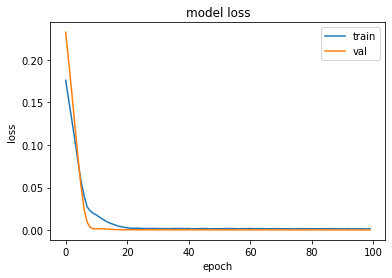

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

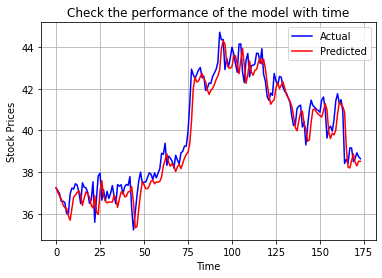

In [60]:
pred = model.predict(testX)
pred = scaler.inverse_transform(pred)

testY_actual = testY.reshape(testY.shape[0] , 1)
testY_actual = scaler.inverse_transform(testY_actual)

plt.plot(testY_actual , 'b')
plt.plot(pred , 'r')

plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Check the performance of the model with time')
plt.legend(['Actual', 'Predicted'], loc='upper right')

plt.grid(True)
plt.show()